In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
%matplotlib inline

sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
le = LabelEncoder()

le_sex = le.fit(df['sex'])
df['sex'] = le_sex.transform(df['sex'])
# del df['sex']

le_smoker = le.fit(df['smoker'])
df['smoker'] = le_smoker.transform(df['smoker'])

le_region = le.fit(df['region'])
df['region'] = le_region.transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
X = df.drop('charges', axis=1).values
y = df['charges'].values.reshape(-1, 1)

X.shape, y.shape

((1338, 6), (1338, 1))

In [7]:
scaler = StandardScaler()

scaler_x = scaler.fit(X)
X = scaler_x.transform(X)

scaler_y = scaler.fit(y)
y = scaler_y.transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070, 1), (268, 1))

In [9]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
r2 = r2_score(y_test, y_pred)
print('R2: ', r2)

R2:  0.7833463107364536


In [12]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

MSE:  0.229524876839686


In [13]:
lr.score(X_test, y_test)

0.7833463107364536

In [37]:
df.drop('charges', axis=1).columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [42]:
X_train_df = pd.DataFrame(X_train, columns=df.drop('charges', axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop('charges', axis=1).columns)

y_train_df = pd.DataFrame(y_train, columns=['charges'])
y_test_df = pd.DataFrame(y_test, columns=['charges'])

In [45]:
ols(
    formula=f'charges ~ {" + ".join(X_test_df.columns)}',
    data=pd.concat([X_test_df, y_test_df], axis=1)
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           9.44e-85
Time:                        23:01:18   Log-Likelihood:                -180.52
No. Observations:                 268   AIC:                             375.0
Df Residuals:                     261   BIC:                             400.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0129      0.030     -0.434      0.664      -0.071       0.045
age            0.2935      0.030      9.771      0.000       0.234       0.353
sex           -0.0216      0.030     -0.717      0.474      -0.081       0.038
bmi            0.1620      0.029      5.529      0.000       0.104       0.220
children       0.0770      0.031      2.494      0.013       0.016       0.138
smoker         0.8203      0.030     27.493      0.000       0.762       0.879
region        -0.0689      0.031     -2.207      0.028      -0.130      -0.007
==============================================================================
Omnibus:                       55.908   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.416
Skew:                           1.054   Prob(JB):                     3.88e-25
Kurtosis:                       5.371   Cond. No.                         1.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

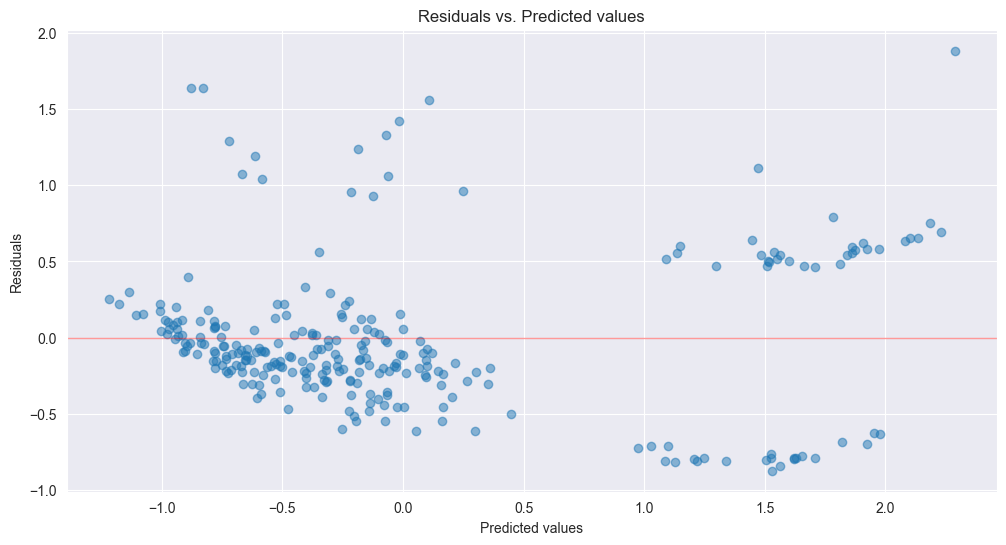

In [49]:
residuals = np.subtract(y_test, y_pred)

plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs. Predicted values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-', linewidth=1, alpha=.4)
plt.show()